In [1]:
#importing pakages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import torch
import matplotlib.pyplot as plt
import helper

In [4]:
#we will use the torchvision package for downloading the mnist dataset
from torchvision import datasets,transforms
#we use transforms to normalize the data
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
#mean 0.5 and std dev 0.5 for the image to normalize
trainset = datasets.MNIST('~/.pytorch/MNIST_data',download=True,train=True,transform = transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

Processing...
Done!


In [5]:
dataiter = iter(trainloader)
images,labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


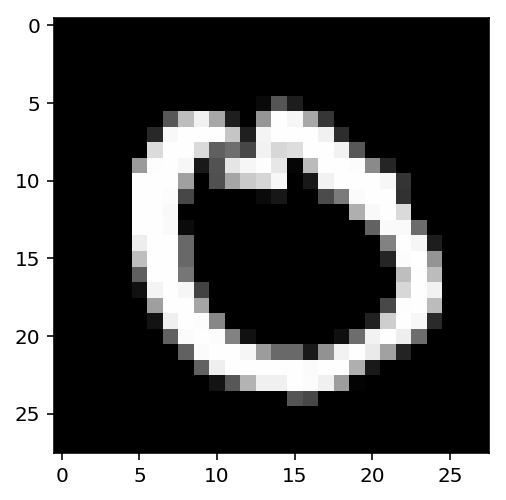

In [15]:
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r')
#squeeze returns a tensor of dimension of input of size 1 removed

In [17]:
#defining the activation function
def sigmoid(x):
    return 1/(1+torch.exp(-x))

In [23]:
#previous shape of images
print(images.shape)
#flattining the input
inputs = images.view(images.shape[0],-1)
#we can also write 784 insted of -1
inputs_a = images.view(images.shape[0],784)
print(inputs.shape)
print(inputs_a.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 784])


In [24]:
#making the basic network
#layer 1
w1 = torch.randn((784,256))
b1 = torch.randn((256))
#layer 2
w2 = torch.randn((256,10))
b2 = torch.randn((10))
#defining the hidden layer
h = sigmoid(torch.mm(inputs,w1)+b1)
#defining the output layer
out = torch.mm(h,w2)+b2

In [39]:
#as the network in not trained so in the output the class probability of all the classes is same
#out_cov = out.type(torch.IntTensor)
#code to convert the type of tensor 
#torch.sum(torch.exp(out),dim=1).view(-1,1)
#this view(-1,1) convert a row to a column tensor and a column tensor to a row tensor

In [42]:
#print(out_cov[0])
# we can apply softmax and get the probability
#dim=1 sum accross columns
#as our result is accross columns we need to sum across columns
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


<Container object of 10 artists>

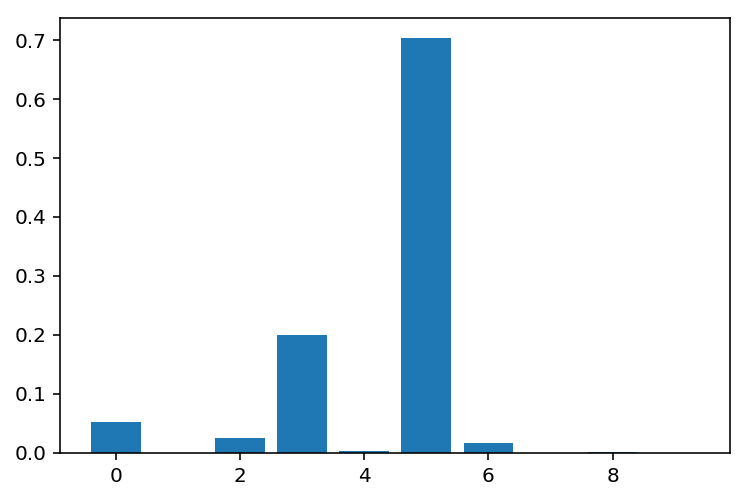

In [57]:
probabilities = softmax(out)
print(probabilities.shape)
print(probabilities.sum(dim=1))
# we got all one as the probabilities all sum to one
# we can plot the distribution and get the more or less same distribution as the model is not trained
#now without doing the sum we can alos see the uniform distribution
#print(probabilities[0])
#u = probabilities[0]
graph_pro = torch.sum(probabilities,dim=0)/64
plt.bar([0,1,2,3,4,5,6,7,8,9],graph_pro.numpy().squeeze())

In [58]:
#there are multiple methods to build a nureal network in pytorch 
#frist method

In [60]:
from torch import nn


In [61]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        #defining the hidden layer
        self.hidden = nn.Linear(784,256)
        #defining the output layer
        self.output = nn.Linear(256,10)
        #defining the activation layer
        self.sigmoid = nn.Sigmoid()
        #we need to find softmax accross columns
        self.softmax = nn.Softmax(dim=1)
    #must have this method
    #order in init is not important 
    #order in forward method is important
    def forward(self,x):
        #passing the input tensor to the expression
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [62]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [63]:
#we can define model more consisely by functional module of pytorch
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        #hidden layer defining 
        self.hidden = nn.Linear(784,256)
        #output layer
        self.output = nn.Linear(256,10)
    def forward(self,x):
        #applying the sigmoid activation
        x = F.sigmoid(self.hidden(x))
        #output layer with softmax activation
        x = F.softmax(self.output(x),dim=1)
        
        return x

In [64]:
classifier = Network()
classifier

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [66]:
#MultiLayer Perceptron
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        #defining hidden layers
        self.fc1=nn.Linear(784,128)
        self.fc2=nn.Linear(128,64)
        #Output layer
        self.fc3=nn.Linear(64,10)
    def forward(self,x):
        x=self.fc1(x)
        x=F.relu(x)
        x=self.fc2(x)
        x=F.relu(x)
        x=self.fc3(x)
        x=F.softmax(x,dim=1)
        
        return x
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [67]:
#initializing weights and biases
#as the weigths and biases are initialized randomly
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0278, -0.0242,  0.0052,  ..., -0.0252,  0.0005, -0.0161],
        [-0.0221,  0.0215,  0.0080,  ..., -0.0253,  0.0212,  0.0251],
        [-0.0182,  0.0019, -0.0293,  ..., -0.0247,  0.0032, -0.0034],
        ...,
        [-0.0081, -0.0146,  0.0265,  ..., -0.0032, -0.0127,  0.0293],
        [-0.0156, -0.0093, -0.0155,  ..., -0.0281,  0.0203,  0.0323],
        [ 0.0234,  0.0144, -0.0232,  ..., -0.0222, -0.0337,  0.0155]],
       requires_grad=True)
Parameter containing:
tensor([-0.0103,  0.0143, -0.0243,  0.0297, -0.0292, -0.0173,  0.0216, -0.0142,
         0.0332, -0.0071, -0.0051,  0.0099, -0.0290, -0.0277,  0.0118, -0.0112,
        -0.0159, -0.0353, -0.0014,  0.0285,  0.0335, -0.0103, -0.0242, -0.0179,
        -0.0305,  0.0053, -0.0026,  0.0104,  0.0282, -0.0084, -0.0356, -0.0098,
        -0.0002,  0.0197,  0.0214, -0.0210,  0.0022, -0.0060,  0.0219,  0.0123,
        -0.0307, -0.0017, -0.0129,  0.0313, -0.0152, -0.0026, -0.0246, -0.0184,
        -0.0329

In [68]:
#we can also fill the data randomly
model.fc1.bias.data.fill_(0)
#_ inplace operation

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [69]:
#sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0097,  0.0168, -0.0140,  ...,  0.0091, -0.0119, -0.0108],
        [ 0.0049,  0.0071, -0.0100,  ...,  0.0113,  0.0190,  0.0037],
        [ 0.0058, -0.0004, -0.0097,  ...,  0.0048,  0.0093, -0.0105],
        ...,
        [ 0.0118, -0.0041,  0.0018,  ...,  0.0062, -0.0206, -0.0042],
        [ 0.0098, -0.0013,  0.0157,  ..., -0.0076,  0.0008, -0.0035],
        [ 0.0124,  0.0026, -0.0082,  ...,  0.0029,  0.0014,  0.0070]])

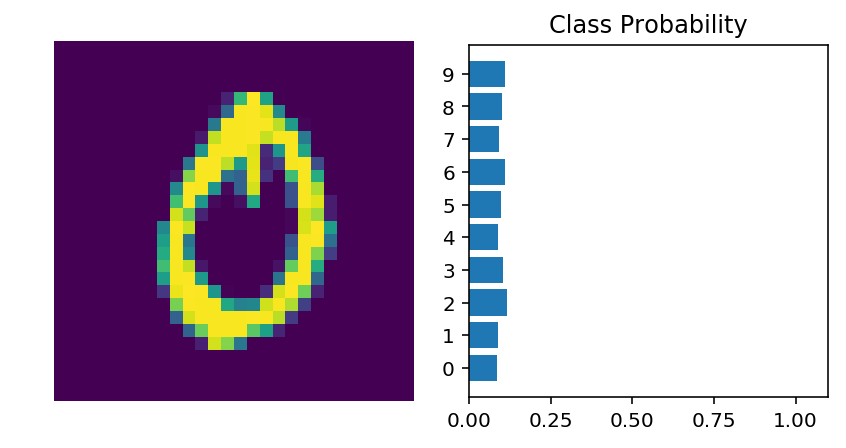

In [70]:
#forward pass
#grabbing the data
dataiter = iter(trainloader)
images,labels = dataiter.next()

#resizing the whole data
images.resize_(64,1,784)

#forward pass thru the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
#helper is custom made python script to work
helper.view_classify(img.view(1,28,28),ps)

In [71]:
#we can use the sequential module of the pytorch so to easily define the model
input_size = 784
hidden_sizes = [128,64]
output_size = 10

#feed forward network
model = nn.Sequential(nn.Linear(input_size,hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0],hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1],output_size),
                      nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


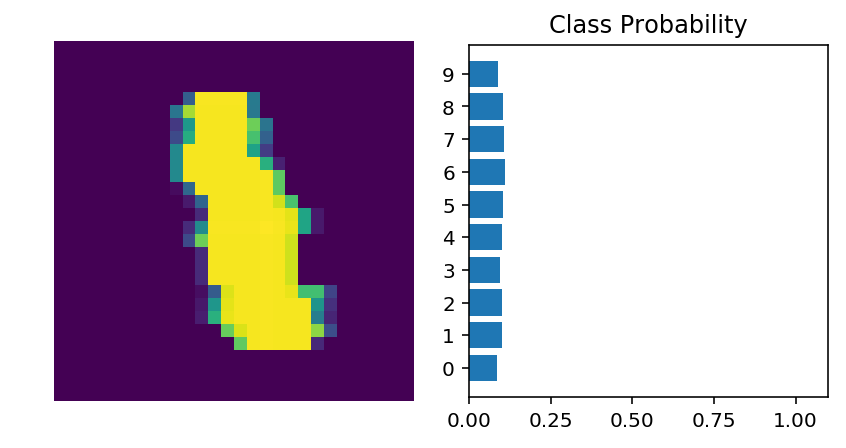

In [72]:
#forward pass thru the network and display output
images,labels = next(iter(trainloader))
images.resize_(images.shape[0],1,784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1,28,28),ps)

In [73]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0218,  0.0146,  0.0139,  ..., -0.0131,  0.0303, -0.0296],
        [ 0.0014,  0.0307, -0.0283,  ..., -0.0087, -0.0286, -0.0179],
        [ 0.0196,  0.0351,  0.0357,  ..., -0.0230,  0.0095, -0.0016],
        ...,
        [-0.0201,  0.0230,  0.0001,  ...,  0.0247, -0.0037,  0.0170],
        [ 0.0188, -0.0318,  0.0242,  ...,  0.0035, -0.0283,  0.0260],
        [-0.0322, -0.0356, -0.0327,  ...,  0.0175, -0.0322, -0.0354]],
       requires_grad=True)

In [77]:
#other way of doing things
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

In [78]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
